# EDA credit-g

## Imports + chemin

In [2]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

# Pour importer le package credit_g_ml
PROJECT_ROOT = Path.cwd().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
SRC_DIR = PROJECT_ROOT / "src"
sys.path.append(str(SRC_DIR))  # noqa: E402

from credit_g_ml.config import TARGET_COL  # noqa: E402
from credit_g_ml.data_loading import load_local_credit_g  # noqa: E402

## Chargement des données

In [3]:
df = load_local_credit_g()
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


## Aperçu général

In [11]:
df.num_dependents.value_counts().sort_index()

num_dependents
1    845
2    155
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   int64  
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   int64  
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   int64  
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   int64  
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

## Statistiques descriptives numériques

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


## Répartition de la cible

In [14]:
df[TARGET_COL].value_counts(normalize=True) * 100

class
good    70.0
bad     30.0
Name: proportion, dtype: float64

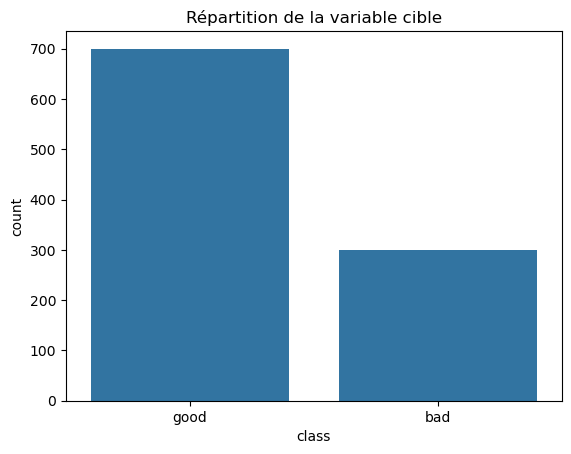

In [15]:
sns.countplot(x=TARGET_COL, data=df)
plt.title("Répartition de la variable cible")
plt.show()

## Séparation numérique / catégoriel (pour la suite)

In [16]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Variables numériques :", numeric_cols)
print("Variables catégorielles :", categorical_cols)

Variables numériques : ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
Variables catégorielles : ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']


## Quelques distributions (numériques)

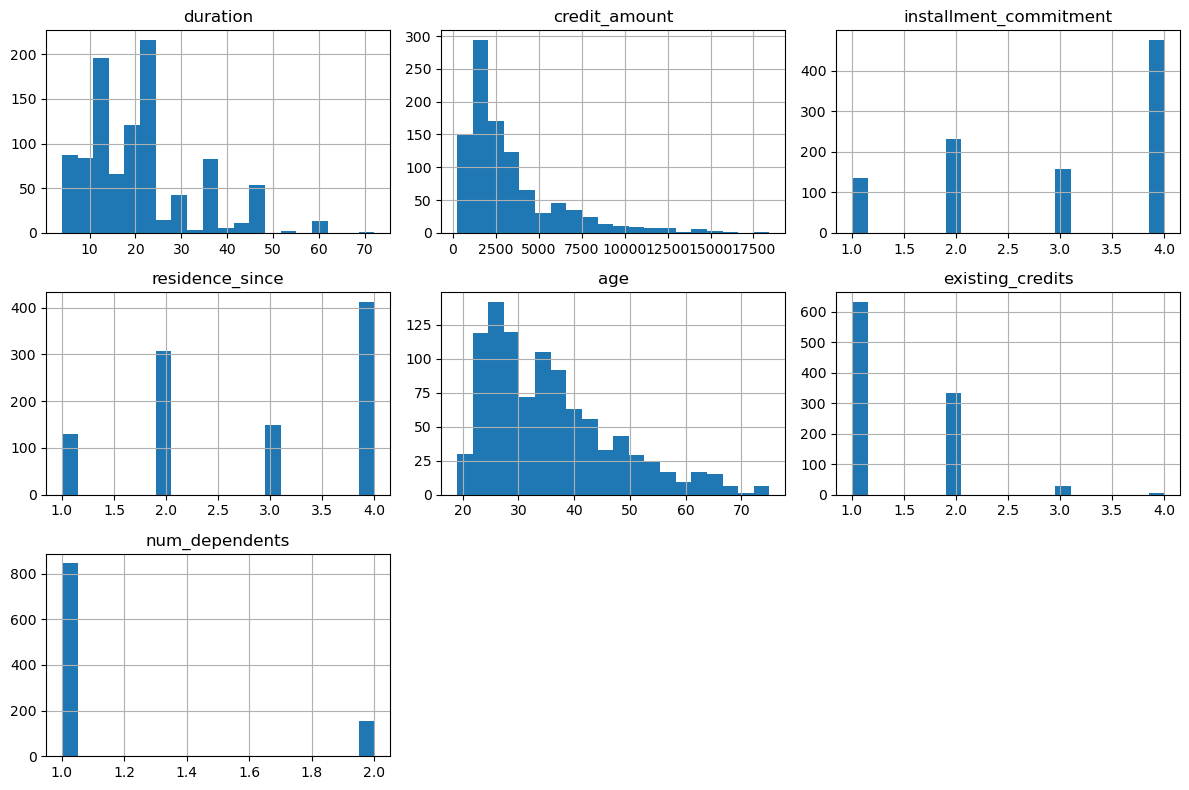

In [17]:
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

## Corrélation entre variables numériques (optionnel)

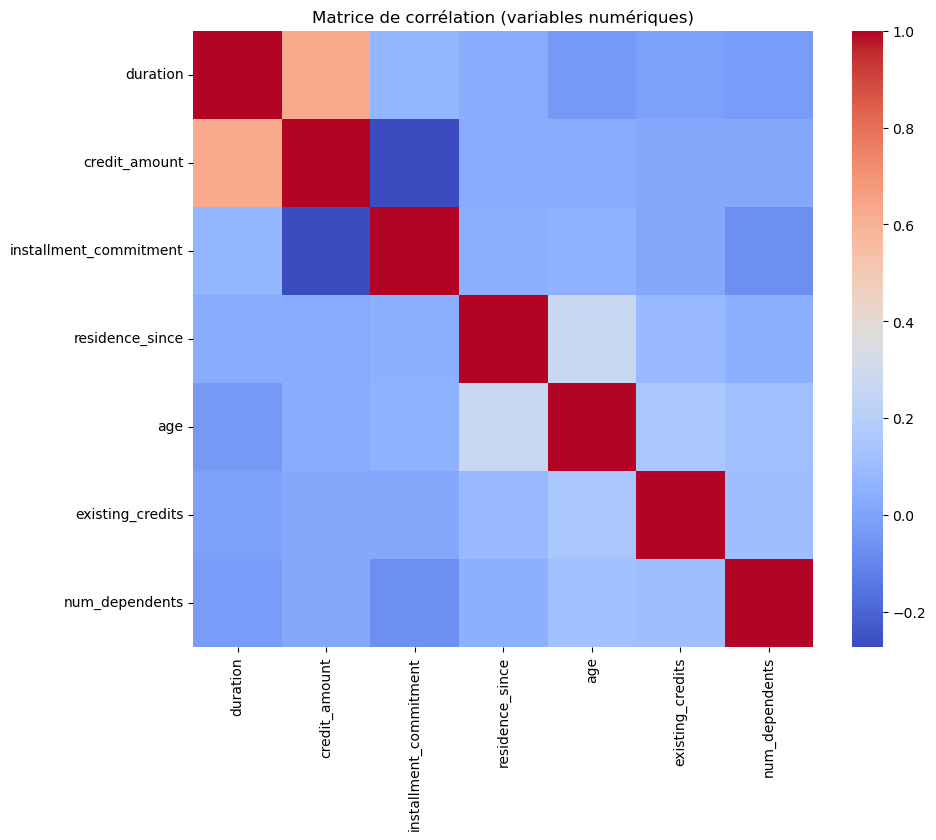

In [18]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Matrice de corrélation (variables numériques)")
plt.show()